## Import necessary libaries

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report

pd.set_option('display.max_rows', 500)

## Read the csv files

In [2]:
train_df = pd.read_csv('C:/Users/alimi/My Python Stuff/DAC-Perceptron/Train.csv')
test_df = pd.read_csv('C:/Users/alimi/My Python Stuff/DAC-Perceptron/Test.csv')

In [3]:
train_df.head()

,Unnamed: 0,time_date,site,continent_id,buyer_country,buyer_region,buyer_city,distance,buyer_id,mobile,...,children,room,destination_id,destination_type,dealing,regency_continent,regency_country,regency_market,cnt,regency_cluster
0,0,8/11/2014 7:46,2,3,66,348,48862,2234.2641,12,0,...,0,1,8250,1,0,3,2,50,628,1
1,1,8/11/2014 8:22,2,3,66,348,48862,2234.2641,12,0,...,0,1,8250,1,1,1,2,50,628,1
2,2,8/11/2014 8:24,2,3,66,348,48862,2234.2641,12,0,...,0,1,8250,1,0,1,2,50,628,1
3,3,8/9/2014 18:05,2,3,66,442,35390,913.1932,93,0,...,0,1,14984,1,0,1,2,50,1457,80
4,4,8/9/2014 18:08,2,3,66,442,35390,913.6259,93,0,...,0,1,14984,1,0,1,2,50,1457,21


In [4]:
test_df.head(20)

,Unnamed: 0,id,time_date,site,continent_id,buyer_country,buyer_region,buyer_city,distance,buyer_id,...,buying_date,dealing_date,adults,children,room,destination_id,destination_type,regency_continent,regency_country,regency_market
0,0,0,9/3/2015 17:09,2,3,66,174,37449,5539.0567,1,...,5/19/2016,5/23/2016,2,0,1,12243,6,6,204,27
1,1,1,9/24/2015 17:38,2,3,66,174,37449,5873.2923,1,...,5/12/2016,5/15/2016,2,0,1,14474,7,6,204,1540
2,2,2,6/7/2015 15:53,2,3,66,142,17440,3975.9776,20,...,7/26/2015,7/27/2015,4,0,1,11353,1,2,50,699
3,3,3,9/14/2015 14:49,2,3,66,258,34156,1508.5975,28,...,9/14/2015,9/16/2015,2,0,1,8250,1,2,50,628
4,4,4,7/17/2015 9:32,2,3,66,467,36345,66.7913,50,...,7/22/2015,7/23/2015,2,0,1,11812,1,2,50,538
5,5,5,7/21/2015 11:58,2,3,66,311,48189,359.8521,51,...,7/22/2015,7/24/2015,4,0,2,11827,1,2,50,447
6,6,6,7/29/2015 7:58,2,3,66,311,48189,237.3465,51,...,8/2/2015,8/3/2015,2,0,1,8271,1,2,50,696
7,7,7,8/1/2015 20:13,2,3,66,348,24811,216.5785,51,...,8/3/2015,8/4/2015,2,0,1,8291,1,2,50,191
8,8,8,11/7/2015 12:29,2,3,66,311,48189,2337.6754,51,...,12/30/2015,12/31/2015,2,0,1,8250,1,2,50,628
9,9,9,11/8/2015 16:21,2,3,66,311,48189,2539.7995,51,...,1/2/2016,1/3/2016,2,0,1,9145,1,2,50,364


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343583 entries, 0 to 343582
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         343583 non-null  int64  
 1   time_date          343583 non-null  object 
 2   site               343583 non-null  int64  
 3   continent_id       343583 non-null  int64  
 4   buyer_country      343583 non-null  int64  
 5   buyer_region       343583 non-null  int64  
 6   buyer_city         343583 non-null  int64  
 7   distance           145685 non-null  float64
 8   buyer_id           343583 non-null  int64  
 9   mobile             343583 non-null  int64  
 10  package            343583 non-null  int64  
 11  channel_id         343583 non-null  int64  
 12  buying_date        342885 non-null  object 
 13  dealing_date       342885 non-null  object 
 14  adults             343583 non-null  int64  
 15  children           343583 non-null  int64  
 16  ro

In [6]:
train_df.head(20)

,Unnamed: 0,time_date,site,continent_id,buyer_country,buyer_region,buyer_city,distance,buyer_id,mobile,...,children,room,destination_id,destination_type,dealing,regency_continent,regency_country,regency_market,cnt,regency_cluster
0,0,8/11/2014 7:46,2,3,66,348,48862,2234.2641,12,0,...,0,1,8250,1,0,3,2,50,628,1
1,1,8/11/2014 8:22,2,3,66,348,48862,2234.2641,12,0,...,0,1,8250,1,1,1,2,50,628,1
2,2,8/11/2014 8:24,2,3,66,348,48862,2234.2641,12,0,...,0,1,8250,1,0,1,2,50,628,1
3,3,8/9/2014 18:05,2,3,66,442,35390,913.1932,93,0,...,0,1,14984,1,0,1,2,50,1457,80
4,4,8/9/2014 18:08,2,3,66,442,35390,913.6259,93,0,...,0,1,14984,1,0,1,2,50,1457,21
5,5,8/9/2014 18:13,2,3,66,442,35390,911.5142,93,0,...,0,1,14984,1,0,1,2,50,1457,92
6,6,7/16/2014 9:42,2,3,66,189,10067,NaN,501,0,...,0,1,8267,1,0,2,2,50,675,41
7,7,7/16/2014 9:45,2,3,66,189,10067,NaN,501,0,...,0,1,8267,1,0,1,2,50,675,41
8,8,7/16/2014 9:52,2,3,66,189,10067,NaN,501,0,...,0,1,8267,1,0,1,2,50,675,69
9,9,7/16/2014 9:55,2,3,66,189,10067,NaN,501,0,...,0,1,8267,1,0,1,2,50,675,70


# Exploratory Data Analysis

## Checking features consistency in training and testing dataset

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343583 entries, 0 to 343582
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         343583 non-null  int64  
 1   time_date          343583 non-null  object 
 2   site               343583 non-null  int64  
 3   continent_id       343583 non-null  int64  
 4   buyer_country      343583 non-null  int64  
 5   buyer_region       343583 non-null  int64  
 6   buyer_city         343583 non-null  int64  
 7   distance           145685 non-null  float64
 8   buyer_id           343583 non-null  int64  
 9   mobile             343583 non-null  int64  
 10  package            343583 non-null  int64  
 11  channel_id         343583 non-null  int64  
 12  buying_date        342885 non-null  object 
 13  dealing_date       342885 non-null  object 
 14  adults             343583 non-null  int64  
 15  children           343583 non-null  int64  
 16  ro

In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21018 entries, 0 to 21017
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         21018 non-null  int64  
 1   id                 21018 non-null  int64  
 2   time_date          21018 non-null  object 
 3   site               21018 non-null  int64  
 4   continent_id       21018 non-null  int64  
 5   buyer_country      21018 non-null  int64  
 6   buyer_region       21018 non-null  int64  
 7   buyer_city         21018 non-null  int64  
 8   distance           11167 non-null  float64
 9   buyer_id           21018 non-null  int64  
 10  mobile             21018 non-null  int64  
 11  package            21018 non-null  int64  
 12  channel_id         21018 non-null  int64  
 13  buying_date        21018 non-null  object 
 14  dealing_date       21018 non-null  object 
 15  adults             21018 non-null  int64  
 16  children           210

There's two missing features in test datasets. Might do predict the missing features with machine learning models on test datasets or dropping both of those features in training dataset. The two missing features are cnt and dealing.

In [9]:
# cnt and dealing will be dropped for the first attempt
train_df.drop(['cnt', 'dealing'], axis=1, inplace=True)

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343583 entries, 0 to 343582
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         343583 non-null  int64  
 1   time_date          343583 non-null  object 
 2   site               343583 non-null  int64  
 3   continent_id       343583 non-null  int64  
 4   buyer_country      343583 non-null  int64  
 5   buyer_region       343583 non-null  int64  
 6   buyer_city         343583 non-null  int64  
 7   distance           145685 non-null  float64
 8   buyer_id           343583 non-null  int64  
 9   mobile             343583 non-null  int64  
 10  package            343583 non-null  int64  
 11  channel_id         343583 non-null  int64  
 12  buying_date        342885 non-null  object 
 13  dealing_date       342885 non-null  object 
 14  adults             343583 non-null  int64  
 15  children           343583 non-null  int64  
 16  ro

## Detecting duplicate rows

In [11]:
train_df[train_df.duplicated()]

,Unnamed: 0,time_date,site,continent_id,buyer_country,buyer_region,buyer_city,distance,buyer_id,mobile,...,dealing_date,adults,children,room,destination_id,destination_type,regency_continent,regency_country,regency_market,regency_cluster


In [12]:
# Removing duplicate rows
train_df.drop_duplicates(inplace=True)

## Analysis on target label

In [13]:
cluster_list = train_df['regency_cluster'].unique().astype(int)

In [14]:
cluster_list.sort()

In [15]:
print(cluster_list)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


Target label contains values ranging from 0 to 99. In conclusion, there's 100 cluster of regency

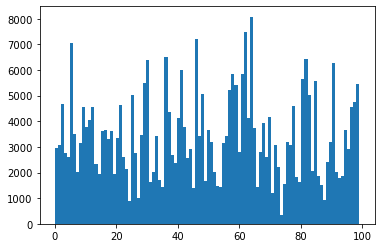

0     2959
1     3058
2     4671
3     2778
4     2610
5     7041
6     3510
7     2004
8     3169
9     4559
10    3769
11    4051
12    4561
13    2320
14    1935
15    3626
16    3649
17    3324
18    3606
19    1952
20    3356
21    4627
22    2587
23    2119
24     897
25    5009
26    2749
27     998
28    3457
29    5503
30    6386
31    1634
32    2001
33    3415
34    1704
35    1435
36    6491
37    4346
38    2690
39    2373
40    4124
41    6008
42    3778
43    2548
44    2922
45    1406
46    7195
47    3426
48    5057
49    1688
50    3656
51    3186
52    2029
53    1471
54    1450
55    3139
56    3408
57    5237
58    5850
59    5414
60    2808
61    5849
62    7486
63    4120
64    8077
65    3732
66    1440
67    2819
68    3918
69    2604
70    4163
71    1197
72    3085
73    2221
74     324
75    1565
76    3206
77    3091
78    4582
79    1827
80    1636
81    5649
82    6445
83    5021
84    2071
85    5562
86    1847
87    1503
88     920
89    2409
90    3192

In [16]:
# Distribution of target label cluster
plt.hist(train_df['regency_cluster'], bins=100)
plt.show();
train_df['regency_cluster'].value_counts().sort_index()

In [17]:
train_df[['mobile', 'regency_cluster']].groupby(['mobile'], as_index=False).mean().sort_values(by='regency_cluster')

,mobile,regency_cluster
0,0,49.434657
1,1,49.531964


## Finding out the types of each features

In [18]:
# Features that contains information about time
temporal_features = [feature for feature in train_df.columns if ("date" in feature)]
print(f'Temporal features: {temporal_features}')

Temporal features: ['time_date', 'buying_date', 'dealing_date']


In [19]:
for feature in temporal_features:
  print(f'{feature} contains {train_df[feature].nunique()} unique values')

time_date contains 255587 unique values
buying_date contains 1076 unique values
dealing_date contains 1083 unique values


There's 3 features in this datasets that are temporal, which is time_date, buying_date, and dealing_date

In [20]:
# Finding out ordinal categorical features
feature_list = [feature for feature in train_df.columns if (feature not  in temporal_features)]
feature_list.pop(0)
for feature in feature_list:
  print(f'{feature} contains {train_df[feature].nunique()} unique values')

site contains 30 unique values
continent_id contains 5 unique values
buyer_country contains 155 unique values
buyer_region contains 653 unique values
buyer_city contains 7256 unique values
distance contains 98335 unique values
buyer_id contains 10000 unique values
mobile contains 2 unique values
package contains 2 unique values
channel_id contains 11 unique values
adults contains 10 unique values
children contains 9 unique values
room contains 9 unique values
destination_id contains 9831 unique values
destination_type contains 8 unique values
regency_continent contains 40 unique values
regency_country contains 6 unique values
regency_market contains 179 unique values
regency_cluster contains 100 unique values


From the results above, there's a couple of nominal categorical features that's is in integer data types. Those features are: <br>
site, continent_id, buyer_country, buyer_region, buyer_city, channel_id, destination_id, destination_type, regency_continent, regency_country, regency_market, regency_cluster

In [21]:
categorical_features = ["site", "continent_id", "buyer_country", "buyer_region", "buyer_city", "channel_id", "destination_id", "destination_type", "regency_continent", "regency_country", "regency_market", "regency_cluster"]

Distance, mobile, package, adults, children, and room will not be transformed with one hot encoding. So we will treat it as it is (numerical features)

In [22]:
numerical_features = [feature for feature in train_df.columns if ((feature not in temporal_features) and (feature not in categorical_features) and (feature != "Unnamed: 0") and (feature != "buyer_id"))]

In [23]:
print(numerical_features)

['distance', 'mobile', 'package', 'adults', 'children', 'room']


The dataset contains 3 string/object features and the rest is integer/float. The temporal features need to be engineered correctly to be usable in machine learning. Unnamed column will be removed in the cleaning process.

In [24]:
train_df.drop('Unnamed: 0', axis=1, inplace=True)
test_df.drop('Unnamed: 0', axis=1, inplace=True)
train_df.drop('buyer_id', axis=1, inplace=True)
test_df.drop('buyer_id', axis=1, inplace=True)

In [25]:
test_df.describe()

,id,site,continent_id,buyer_country,buyer_region,buyer_city,distance,mobile,package,channel_id,adults,children,room,destination_id,destination_type,regency_continent,regency_country,regency_market
count,2.101800e+04,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,11167.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.00000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000
mean,1.091427e+06,13.518032,2.422876,69.478733,288.636217,26046.208964,1804.284095,0.125131,0.104720,6.021315,1.932249,0.221334,1.13517,16451.102484,2.894471,3.256161,87.658103,624.977543
std,7.254334e+05,12.089313,0.880538,59.374423,228.453711,17253.875341,2423.374351,0.330875,0.306199,3.885809,0.919657,0.635141,0.50032,12891.856543,2.273241,1.751716,56.043829,533.399561
min,0.000000e+00,2.000000,0.000000,0.000000,0.000000,0.000000,0.030700,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,4.000000,1.000000,0.000000,0.000000,0.000000
25%,3.635832e+05,2.000000,2.000000,43.500000,71.000000,8998.500000,212.266400,0.000000,0.000000,2.000000,1.000000,0.000000,1.00000,8267.000000,1.000000,2.000000,50.000000,160.250000
50%,1.084730e+06,11.000000,3.000000,66.000000,258.000000,25315.000000,684.744300,0.000000,0.000000,5.000000,2.000000,0.000000,1.00000,11938.500000,1.000000,2.000000,50.000000,569.500000
75%,1.808007e+06,24.000000,3.000000,69.000000,363.000000,41948.000000,2333.770300,0.000000,0.000000,10.000000,2.000000,0.000000,1.00000,23038.750000,6.000000,6.000000,126.000000,892.000000
max,2.171330e+06,52.000000,4.000000,239.000000,1017.000000,56507.000000,11570.060100,1.000000,1.000000,10.000000,9.000000,7.000000,8.00000,65775.000000,9.000000,6.000000,212.000000,2117.000000


## Checking feature's distribution

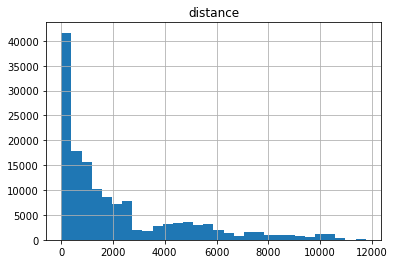

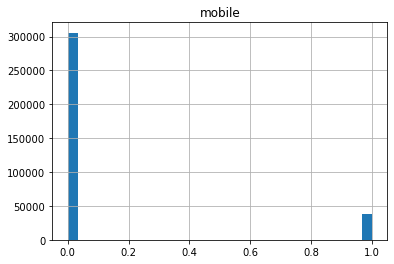

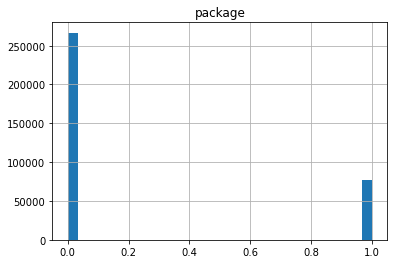

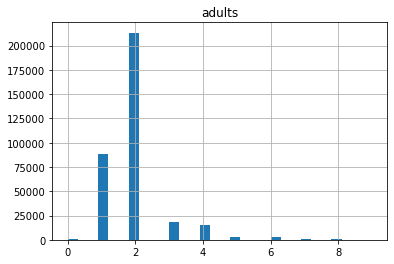

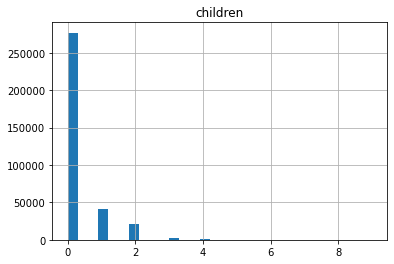

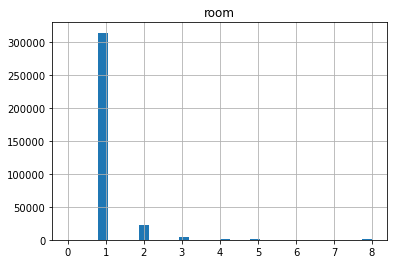

In [26]:
for feature in numerical_features:
    train_df[feature].hist(bins=30)
    plt.title(feature)
    plt.show()

In [27]:
# checking distributin for categorical values
for feature in categorical_features:
  print(f'Feature: {feature}')
  print(train_df[feature].value_counts(sort=True))

Feature: site
2     117070
24    110851
37     16744
23     15969
8      15963
13     12015
34     10685
11      8788
28      7174
25      3913
17      3740
30      3147
15      2492
33      2476
18      2304
35      2063
26      1866
20      1334
27      1331
22      1226
10       822
31       506
36       451
7        403
48       121
6         64
47        39
46        22
16         2
19         2
Name: site, dtype: int64
Feature: continent_id
3    136545
2    126637
1     58539
4     19110
0      2752
Name: continent_id, dtype: int64
Feature: buyer_country
66     104621
3      102033
205     18698
69      15659
1       15582
77      15476
46      11237
68       6966
23       4214
133      3599
195      3236
55       3062
194      3019
70       3017
215      2967
231      2512
119      2318
167      2005
202      1705
0        1458
63       1436
182      1025
5         934
115       914
12        897
50        893
80        692
149       672
28        662
57        604
198       542

## Looking for missing values

In [28]:
# Function to calculate missing values
def missing_percentage(df):
    missing = df.isnull().sum()*100/len(df)
    print (missing[missing>0].sort_values())

In [29]:
missing_percentage(train_df)

buying_date      0.203153
dealing_date     0.203153
distance        57.598310
dtype: float64


In [30]:
train_df[(train_df['buying_date'].isnull()) & (train_df['dealing_date'].isnull())]

,time_date,site,continent_id,buyer_country,buyer_region,buyer_city,distance,mobile,package,channel_id,...,dealing_date,adults,children,room,destination_id,destination_type,regency_continent,regency_country,regency_market,regency_cluster
1671,6/10/2013 18:56,2,3,66,226,9427,1809.9688,0,1,2,...,NaN,2,0,1,9171,1,1,4,118,66
2474,12/19/2014 19:14,24,2,3,50,5703,NaN,1,0,2,...,NaN,2,1,1,8242,1,2,3,171,37
2819,4/4/2013 14:05,24,2,3,38,46556,NaN,0,0,9,...,NaN,2,0,1,8818,1,1,3,99,82
2822,4/9/2013 16:07,24,2,3,38,46556,NaN,0,0,9,...,NaN,2,0,1,8818,1,1,3,99,82
3009,10/9/2013 21:45,24,2,3,50,5703,NaN,0,0,1,...,NaN,2,0,1,8822,1,1,3,130,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336745,5/15/2013 11:47,2,3,66,467,36345,72.5636,1,0,9,...,NaN,2,0,1,27396,6,1,2,50,9
336746,5/15/2013 11:47,2,3,66,467,36345,74.1174,1,0,9,...,NaN,2,0,1,27396,6,2,2,50,25
339674,9/6/2013 23:02,2,3,66,174,43471,8669.2639,1,0,1,...,NaN,2,0,1,20116,6,2,3,5,26
339675,10/7/2013 23:11,2,3,66,174,24103,2452.4882,1,0,1,...,NaN,2,0,1,12233,6,1,2,50,69


The records that are missing buying_date and dealing_date is the same records

In [31]:
missing_percentage(test_df)

distance    46.86935
dtype: float64


## Data Cleaning

In [32]:
train_df['buying_date'].fillna(train_df['buying_date'].mode()[0], inplace=True)
train_df['dealing_date'].fillna(train_df['dealing_date'].mode()[0], inplace=True)

In [33]:
missing_percentage(train_df)

distance    57.59831
dtype: float64


## Finding out correlation of each features

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

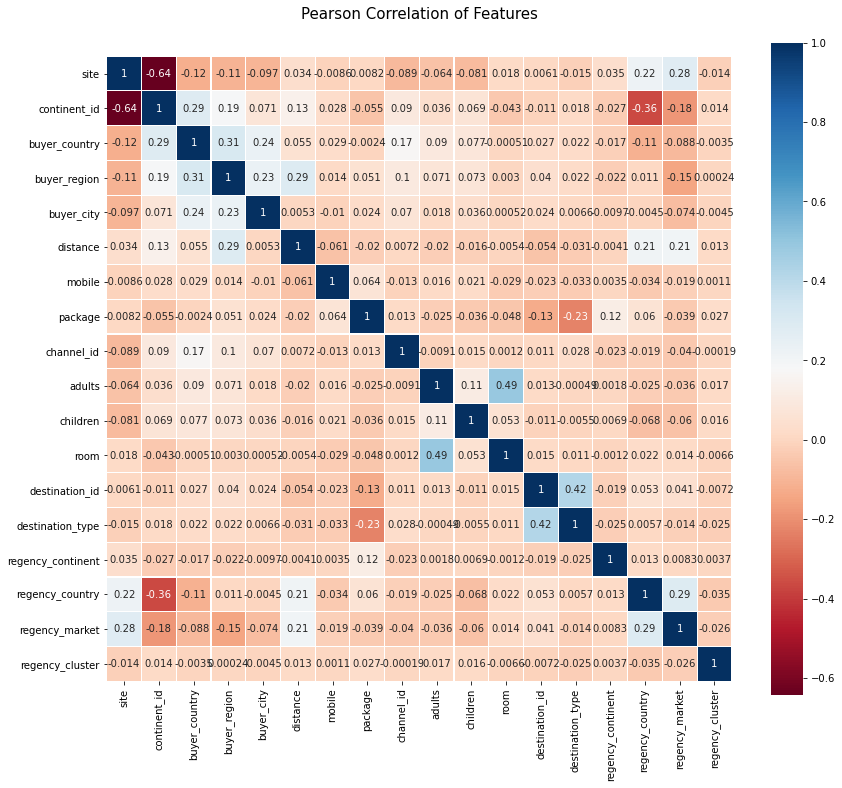

In [34]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

## Feature engineering on date features

In [35]:
temporal_features

['time_date', 'buying_date', 'dealing_date']

In [36]:
for feature in temporal_features:
  train_df[feature] = pd.to_datetime(train_df[feature])
  test_df[feature] = pd.to_datetime(test_df[feature])

In [37]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343583 entries, 0 to 343582
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   time_date          343583 non-null  datetime64[ns]
 1   site               343583 non-null  int64         
 2   continent_id       343583 non-null  int64         
 3   buyer_country      343583 non-null  int64         
 4   buyer_region       343583 non-null  int64         
 5   buyer_city         343583 non-null  int64         
 6   distance           145685 non-null  float64       
 7   mobile             343583 non-null  int64         
 8   package            343583 non-null  int64         
 9   channel_id         343583 non-null  int64         
 10  buying_date        343583 non-null  datetime64[ns]
 11  dealing_date       343583 non-null  datetime64[ns]
 12  adults             343583 non-null  int64         
 13  children           343583 non-null  int64   

In [38]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21018 entries, 0 to 21017
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 21018 non-null  int64         
 1   time_date          21018 non-null  datetime64[ns]
 2   site               21018 non-null  int64         
 3   continent_id       21018 non-null  int64         
 4   buyer_country      21018 non-null  int64         
 5   buyer_region       21018 non-null  int64         
 6   buyer_city         21018 non-null  int64         
 7   distance           11167 non-null  float64       
 8   mobile             21018 non-null  int64         
 9   package            21018 non-null  int64         
 10  channel_id         21018 non-null  int64         
 11  buying_date        21018 non-null  datetime64[ns]
 12  dealing_date       21018 non-null  datetime64[ns]
 13  adults             21018 non-null  int64         
 14  childr

In [39]:
for feature in temporal_features:
  train_df[feature+'_year'] = train_df[feature].dt.year
  train_df[feature+'_month'] = train_df[feature].dt.month
  train_df[feature+'_day'] = train_df[feature].dt.day
  train_df[feature+'_weekday'] = train_df[feature].dt.weekday
  test_df[feature+'_year'] = test_df[feature].dt.year
  test_df[feature+'_month'] = test_df[feature].dt.month
  test_df[feature+'_day'] = test_df[feature].dt.day
  test_df[feature+'_weekday'] = test_df[feature].dt.weekday

In [40]:
train_df.drop(temporal_features, axis=1, inplace=True)

In [41]:
test_df.drop(temporal_features, axis=1, inplace=True)

## Implement XGBoost for baseline results

In [42]:
X = train_df.drop('regency_cluster', axis=1)
y = train_df['regency_cluster']

In [43]:
# param_grid = {'n_estimators': [64, 100, 128], 'max_depth': [2, 3, 4, 5], 'eta': [0.01, 0.1, 0.3], 'subsample': [0, 0.1, 0.3, 0.5, 0.7, 1], "colsample_bytree": [0, 0.1, 0.3, 0.5, 0.7, 1]}
# grid_search_obj = GridSearchCV(XGBClassifier(), param_grid=param_grid)
# grid_search_obj.fit(X, y)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
gb_obj = XGBClassifier(colsample_bytree=0.3,eta=0.1,max_depth=3,n_estimators=100,subsample=0.5)
gb_obj.fit(X_train, y_train)

C:\Users\alimi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:00:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, eta=0.1, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.100000001, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [45]:
y_pred = gb_obj.predict(X_test)

In [47]:
print(classification_report(y_test, y_pred))

C:\Users\alimi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.15      0.45      0.22       923
           1       0.29      0.90      0.44       897
           2       0.12      0.08      0.10      1403
           3       0.41      0.03      0.06       846
           4       0.14      0.02      0.04       836
           5       0.09      0.13      0.11      2004
           6       0.22      0.00      0.00      1081
           7       0.42      0.03      0.06       577
           8       0.15      0.30      0.20       948
           9       0.10      0.09      0.09      1363
          10       0.07      0.00      0.01      1136
          11       0.10      0.05      0.06      1184
          12       0.16      0.24      0.19      1369
          13       0.33      0.00      0.01       736
          14       0.31      0.01      0.01       603
          15       0.38      0.01      0.02      1070
          16       0.31      0.01      0.01      1073
          17       0.09    